# K-Means:

In [1]:
# Bibliotecas:

import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import sys
import random

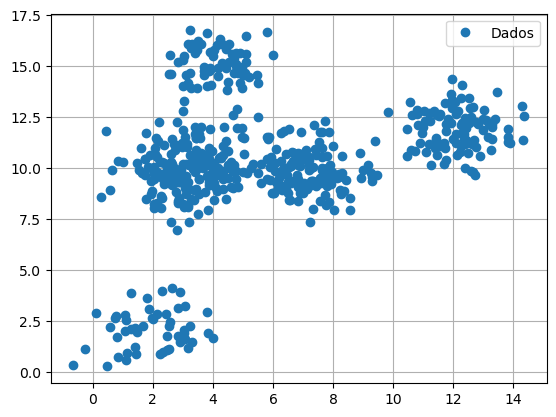

In [2]:
data = np.r_[
    np.random.randn(100, 2) + np.array([12, 12]),
    np.random.randn(70, 2) + np.array([4, 15]),
    np.random.randn(50, 2) + np.array([2, 2]),
    np.random.randn(150, 2) + np.array([7, 10]),
    np.random.randn(200, 2) + np.array([3, 10])
]

plt.plot(data[:,0], data[:,1], marker='o', ls='none', label='Dados')
plt.grid()
plt.legend()
plt.show()

In [3]:
type(data)

numpy.ndarray

In [4]:
# Gerando centroides com a função random:

k = 5 # n° de centroides
centroids = np.zeros((k,2)) # array com zeros que será preenchido no loop abaixo

for i in range(k):
    x = np.array(np.random.uniform(min(data[:,0]),max(data[:,0])))
    y = np.array(np.random.uniform(min(data[:,1]),max(data[:,1])))
    centroids[i] = x, y
    
centroids

array([[12.2693094 ,  9.73067171],
       [10.37448552, 14.81750077],
       [ 7.03854011, 13.12673851],
       [ 8.48440767,  7.03006381],
       [ 3.5717337 , 13.06574176]])

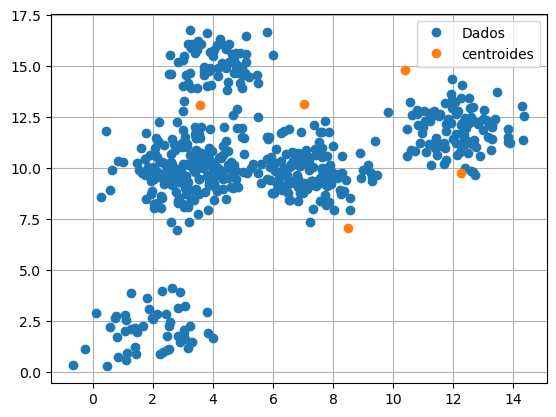

In [5]:
plt.plot(data[:,0], data[:,1], marker='o', ls='none', label='Dados')
plt.plot(centroids[:,0], centroids[:,1], marker='o', ls='none', label='centroides')
plt.grid()
plt.legend()
plt.show()

In [6]:
# Gerando centroides com a função random:

k = 5 # n° de centroides
centroids = np.zeros((k,2)) # array com zeros que será preenchido no loop abaixo

for i in range(k):
    index = np.random.randint(data.shape[0])
    centroids[i] = data[index,:]
    
centroids

array([[ 2.83563601, 15.22007494],
       [ 2.68437729, 10.0560492 ],
       [ 4.24075162, 16.33816474],
       [ 2.68437729, 10.0560492 ],
       [ 2.03619876,  9.4336263 ]])

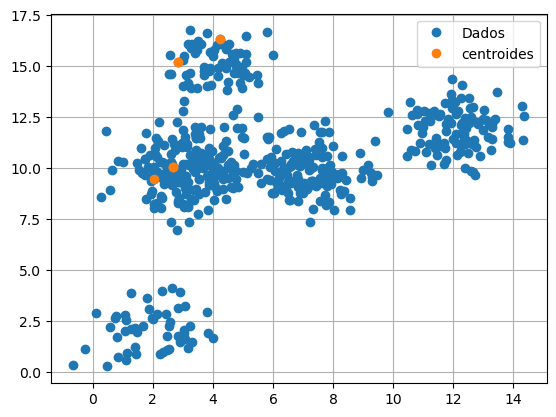

In [7]:
plt.plot(data[:,0], data[:,1], marker='o', ls='none', label='Dados')
plt.plot(centroids[:,0], centroids[:,1], marker='o', ls='none', label='centroides')
plt.grid()
plt.legend()
plt.show()

In [8]:
#Precisamos do modulo random
import random
 
def centrus(data, k=5, random='inicialization1'):
     
    centroids = np.zeros((k,2))
    
    if random == 'range':
        for i in range(k):
            x = np.array(np.random.uniform(min(data[:,0]),max(data[:,0])))
            y = np.array(np.random.uniform(min(data[:,1]),max(data[:,1])))
            centroids[i] = x, y
            
    if random == 'input_data':
        for i in range(k):
            index = np.random.randint(data.shape[0])
            centroids[i] = data[index,:]
            
    return centroids

In [9]:
centroidss = centrus(data, random='input_data')
centroidss

array([[ 3.18653091, 10.17515391],
       [ 4.43875967, 15.81912907],
       [ 2.3024255 ,  9.69984972],
       [ 3.28467627,  8.49012771],
       [ 1.63799551,  9.73848004]])

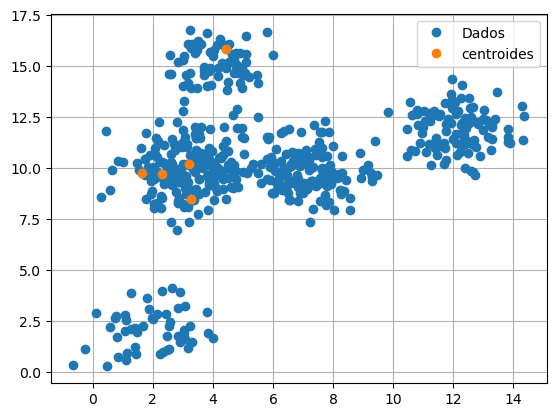

In [10]:
plt.plot(data[:,0], data[:,1], marker='o', ls='none', label='Dados')
plt.plot(centroidss[:,0], centroidss[:,1], marker='o', ls='none', label='centroides')
plt.grid()
plt.legend()
plt.show()

In [11]:
#Primeiro definimos a função para calculo de distância.
from math import sqrt
 
def manhattan(v1,v2):
    """Essa função recebe duas
       listas e retorna a
       distancia entre elas"""
 
    #Armazena o quadrado da distância
    dist = 0.0
    for x in range(len(v1)):
        dist += abs(v1[x] - v2[x])
 
    #Tira a raiz quadrada da soma
    manhattan = sqrt(dist)
    return manhattan

In [12]:
#Primeiro definimos a função para calculo de distância.
from math import sqrt
 
def euclidian(v1,v2):
    """Essa função recebe duas
       listas e retorna a
       distancia entre elas"""
 
    #Armazena o quadrado da distância
    dist = 0.0
    for x in range(len(v1)):
        dist += (v1[x] - v2[x])**2
 
    #Tira a raiz quadrada da soma
    eucli = sqrt(dist)
    return eucli

In [13]:
# Calculo da distância entre cada dado com todos os centroides:

for j in range(len(data)):
    dado=data[j]
    for i in range(k):
        d = euclidian(centroids[i],dado) #Calcula a distancia em relação ao centroide
        if j == 1:
            print('distância:', d, 'amostra:', j)
    
# Abaixo a distância de uma amostra para todos os centroides
# Próximo passo: escolher a menor distância!

distância: 11.762723684748613 amostra: 1
distância: 11.26854104911056 amostra: 1
distância: 10.930593128251926 amostra: 1
distância: 11.26854104911056 amostra: 1
distância: 11.98979715590102 amostra: 1


In [14]:
# Gerando centroides com a função random:

k = 5 # n° de centroides
centroids = np.zeros((k,2)) # array com zeros que será preenchido no loop abaixo

for i in range(k):
    index = np.random.randint(data.shape[0])
    centroids[i] = data[index,:]
    
centroids

array([[ 2.03055587,  8.00606545],
       [ 3.11598618,  8.7089212 ],
       [10.57342809, 10.88104209],
       [13.26553988, 10.85696399],
       [ 8.91049148,  9.51208254]])

In [15]:
lastmatches = None
index = []
#O número de iterações será no máximo 100
for t in range(2):
    bestmatches = [[] for i in range(k)]
    #[0]*np.size(data,0)
    
    if t == 0:
        centroids_1 = np.copy((centroids))
    
    cent=np.zeros((5, 2))
    #Verifica qual centroide esta mais perto de cada instancia
    for j in range(len(data)):
        row=data[j]
        bestmatche = 0 #Aqui armazeno o índice da menor distância para comparação
        for i in range(k):
            d = euclidian(centroids[i],row) #Calcula a distancia em relação ao centroide
            if d < euclidian(centroids[bestmatche],row): ###Comparação entre as distâncias entre um dado e todos centroides?
                bestmatche = i
                index.append(bestmatche)
        bestmatches[bestmatche].append(j)
        
    
        
        #print(bestmatche)
    
    #Se o resultado for o mesmo que da ultima vez esta completo
    if bestmatches == lastmatches:
        break
    lastmatches=bestmatche
    
    #index.append(lastmatches)

    #Move o centroide para a zona média do cluster
    #no caso teremos 
    for i in range(k):
        avgs=[0.0]*len(data[0])
        if len(bestmatches[i])>0:
            for rowid in bestmatches[i]:
                for m in range(len(data[rowid])):
                    avgs[m] += data[rowid][m]
            for j in range(len(avgs)):
                avgs[j] /= len(bestmatches[i])
            centroids[i]=avgs
        

In [16]:
# index guarda os indices de cada amostra:
index[:10]

# Abaixo os 10 primeiros índices 

[1, 2, 3, 1, 2, 3, 1, 2, 3, 1]

In [17]:
centroids_1

array([[ 2.03055587,  8.00606545],
       [ 3.11598618,  8.7089212 ],
       [10.57342809, 10.88104209],
       [13.26553988, 10.85696399],
       [ 8.91049148,  9.51208254]])

In [18]:
centroids

array([[ 2.01325523,  2.36822511],
       [ 3.42585227, 11.30608887],
       [11.06952267, 12.00536984],
       [12.64946164, 11.80620402],
       [ 7.1182832 ,  9.82144144]])

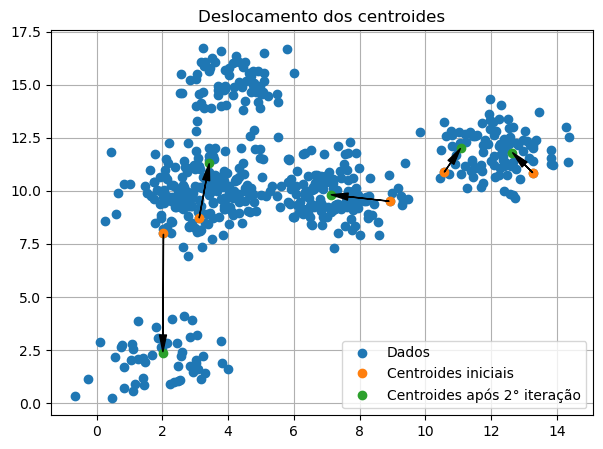

In [19]:
plt.figure(figsize=(7,5))
plt.plot(data[:,0], data[:,1], marker='o', ls='none', label='Dados')
plt.plot(centroids_1[:,0], centroids_1[:,1], marker='o', ls='none', label='Centroides iniciais')
plt.plot(centroids[:,0], centroids[:,1], marker='o', ls='none', label='Centroides após 2° iteração')
plt.title('Deslocamento dos centroides')
for old, new in zip(centroids_1, centroids):
    plt.annotate('', xy=new, xytext=old,
             arrowprops=dict(facecolor='black', shrink=0.01, width=0.1, headwidth=5))
plt.grid()
plt.legend()
plt.show()

### Abaixo, temos a forma de inicialização usando o kmeans++:

##### Obs: adaptado da referência usada: https://www.geeksforgeeks.org/ml-k-means-algorithm/

### Abaixo, temos o kmeans++ final antes de usar no coódigo Kmeans final:

In [20]:
def kmeans_plus_plus(data, k):
    
    '''
    Inicialização usando o kmeans++:
    inputs:
    data = numpy array onde será sorteado um ponto inicial e a partir dele selecionar outros centroides
    k = numero de clusters
    
    output:
    coordenadas dos centroides após o uso do kmeans++
    
    Obs: o código não seleciona o próximo centroide através de uma distribuição de probabilidade
    ele apenas seleciona o proximo centroide como sendo o mais distante dos centroides ja selecionados!
    '''
    
    ## inicializa uma lista de centróides e adiciona um ponto de dados selecionado aleatoriamente para a lista:
    centroids = []
    centroids.append(data[np.random.randint(
            data.shape[0]), :])
  
    ## iterações para gerar os outros centroides (k - 1):
    for c_id in range(k - 1):
         
        ## inicializa uma lista para armazenar distâncias entre os dados até o centróide mais próximo:
        dist = []
        for i in range(data.shape[0]):
            point = data[i, :]
            d = sys.maxsize
             
            ## calcula a distância de um dado até os centróide, selecionado e armazene a distância mínima:
            for j in range(len(centroids)):
                temp_dist = euclidian(point, centroids[j])
                d = min(d, temp_dist)
            dist.append(d)
             
        ## seleciona um dado com distância máxima como nosso próximo centróide
        dist = np.array(dist)
        next_centroid = data[np.argmax(dist), :]
        centroids.append(next_centroid)
        dist = []
        
    return centroids


### Em forma de código completo:

In [21]:
def K_means(data, k, it, tol, random='range'):
    
    '''
    Esse código aplica o método k-means a um conjunto de dados de entrada
    
    entrada:
    data = dados a serem agrupados;
    k = n° de centroides (quantos grupos se quer dividir os dados)
    tol = tolerância 
    random = forma de inicialização dos centroides
    
    método:
    -> calculo da distância entre cada dado com os centroides
    -> atualização da posição do centroide para a média do grupo
    -> se posição atual - posição anterios dos centroides for menor que tolerância (tol) o código para
    -> se o critério de tolerância não for atendida, o código continua a realizar as iterações (talvez faça todas as iterações!)
    
    saída:
    bestmatches = dados separados em grupos
    centroids = coordenadas dos centroides após o fim das iterações 
    conta = quantas iterações foram realizadas
    '''
     
    nprop = data.shape[1]
    centroids = np.zeros((k, nprop)) # Array vazio que será preencido pelos Centroids (automatizar isso)
    
    # Condicional -> se "range", os centroides serão encolhidos de forma aleatória dentro de um range:
    if random == 'range':
        
        for npro in range(nprop):
            for i in range(k):
                centroids[i,npro]  = np.array(np.random.uniform(min(data[:,npro]),max(data[:,npro])))
            
    # Condicional -> se "input_data", os centroides serão escolhidos entre os dados de entrada:     
    if random == 'input_data':
        
        for i in range(k):
            index = np.random.randint(data.shape[0])
            centroids[i] = data[index,:]
            
    # Condicional -> para inicialização k-means++:
    if random == 'kmeans++':
        
        centroids = kmeans_plus_plus(data, k) # chamando a função kmeans++
        
        
    conta = 0
    ###lastmatches = None
    index = [0.0]*np.size(data,0) # para armazenar as etiquetas de cada amostra
    
    #O número de iterações será no máximo 100
    for t in range(it):
        bestmatches = [[] for i in range(k)]
     
        #Verifica qual centroide esta mais perto de cada instancia
        for j in range(len(data)):
            row=data[j]
            bestmatche = 0 #Aqui armazeno o índice da menor distância para comparação
            for i in range(k):
                d = euclidian(centroids[i],row) #Calcula a distancia em relação ao centroide
                if d < euclidian(centroids[bestmatche],row): ###Armazenando a menor distância entre a amaostra e o centroide!
                    bestmatche = i
            index[j] = bestmatche # add um indice que representa o centroide mais próximo
            bestmatches[bestmatche].append(j)
     
        #Move o centroide para a zona média do cluster
        #no caso teremos 
        for i in range(k):
            avgs=[0.0]*len(data[0])
            if len(bestmatches[i])>0:
                for rowid in bestmatches[i]:
                    for m in range(len(data[rowid])):
                        avgs[m] += data[rowid][m]
                for j in range(len(avgs)):
                    avgs[j] /= len(bestmatches[i])
                centroids[i]=avgs
                
        # Condicional para convergência: se a posição atual dos centroides - posição anterior...
        # ...for menor que uma tolerância o código para e converge!
        if np.allclose(centroids[i],centroids[i-1], rtol=tol) == True:
            break 
            
        ###lastmatches=bestmatche
        conta += 1 # conta quantas iterações ocorreram
    
    
    # Cálculo da inércia:
    inercia = 0
    for centro_index in range (k):
        for amostra in range (len(index)):
            # Se a etiqueta tiver o mesmo índice que o centroide, a operação para Ínercia será realizada:
            if index[amostra] == centro_index: 
                inercia += sum(abs((data[amostra] - centroids[centro_index])**2))
                
    return centroids, conta, index, inercia

In [22]:
#Aqui retorna um lista de duas dimensões com os índices de cada cluster
centroids_coord, ite, index, inercia = K_means(data, k=5, it=50,tol=0.1, random='input_data')


In [23]:
#centroids_coord = np.asarray(centroids_coord)
centroids_coord

array([[ 4.14350904, 14.98170656],
       [ 1.96194843,  2.07777653],
       [ 7.16350098,  9.83755581],
       [ 3.17621024,  9.91191117],
       [12.13988927, 11.87961444]])

In [24]:
ite

50

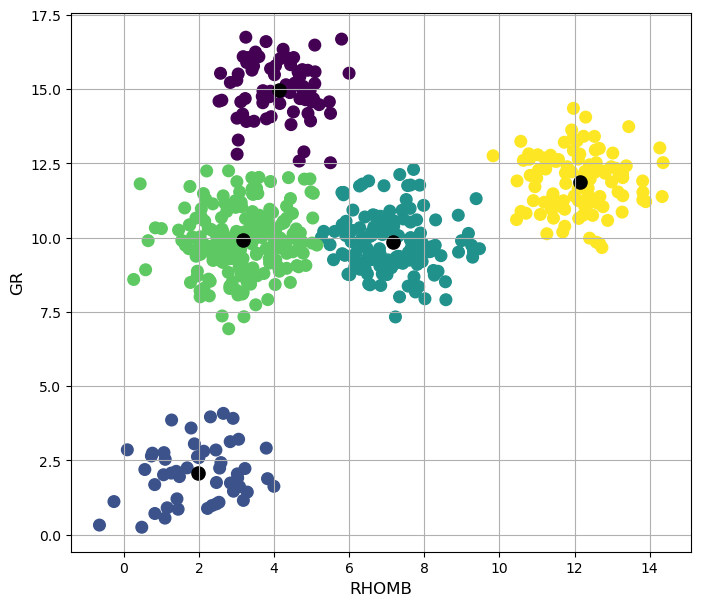

In [25]:
plt.close('all')
plt.figure(figsize=(8,7))

plt.scatter(data[:,0], data[:,1], c = index, cmap='viridis'
            , s=70, alpha=1.0) 
plt.scatter(centroids_coord[:,0], centroids_coord[:,1], c='k'
            , s=90, alpha=1.0) 
plt.xlabel('RHOMB', fontsize = 12)
plt.ylabel('GR', fontsize = 12)
plt.grid(True)
plt.show()

In [26]:
d = {'etiquetas': index,'prop1': data[:,0],'prop2': data[:,1]}

df = pd.DataFrame(d)
df

,etiquetas,prop1,prop2
0,4,13.818401,11.527192
1,4,13.893684,11.209934
2,4,12.407824,11.345426
3,4,10.777208,12.819440
4,4,12.261846,11.076217
...,...,...,...
565,3,4.125461,9.915197
566,3,3.107502,9.588433
567,3,2.600012,10.672763
568,3,3.036991,8.068171


### Chamando a função Kmeans completa a partir do arquivo .py:

In [27]:
import Kmeans

In [28]:
tol = 0.3
it = 50
k = 5

In [29]:
centroids_coord, ite, index, inercia = Kmeans.K_means(data, k, it, tol, random='input_data')


In [30]:
#centroids_coord = np.asarray(centroids_coord)
centroids_coord

array([[ 7.16350098,  9.83755581],
       [ 4.14350904, 14.98170656],
       [12.13988927, 11.87961444],
       [ 1.96194843,  2.07777653],
       [ 3.17621024,  9.91191117]])

In [31]:
ite

50

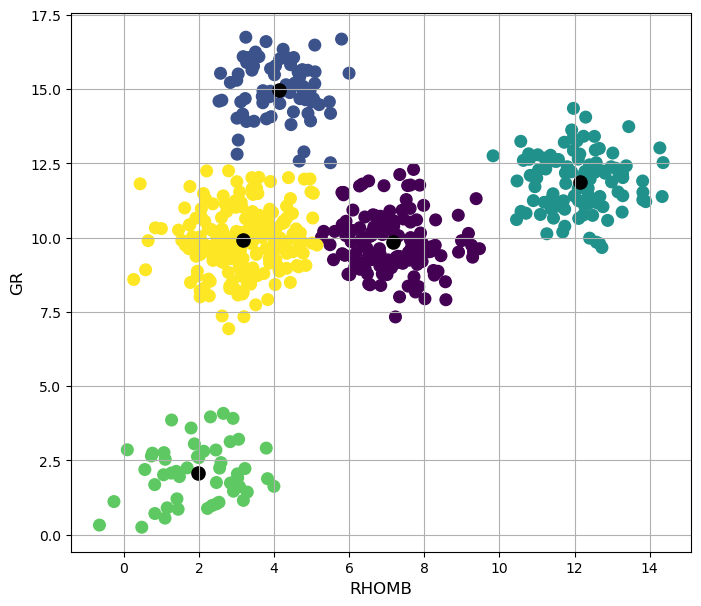

In [32]:
plt.close('all')
plt.figure(figsize=(8,7))

plt.scatter(data[:,0], data[:,1], c = index, cmap='viridis'
            , s=70, alpha=1.0) 
plt.scatter(centroids_coord[:,0], centroids_coord[:,1], c='k'
            , s=90, alpha=1.0) 
plt.xlabel('RHOMB', fontsize = 12)
plt.ylabel('GR', fontsize = 12)
plt.grid(True)
plt.show()

### Aplicando em Perfis Geofísicos sintéticos, gerados em um programa de modelagem:

In [33]:
# Carregamento dos dados:
cab_10 = ['prof', 'rhob', 'gr', 'dt']
data_10 = pd.read_csv('../arq1.txt', sep='\s+',
                      skiprows=1, names = cab_10, usecols=(0,1,2,3) )

In [34]:
data = np.zeros((len(data_10['rhob']), 3))
np.size(data)

2574

In [35]:
data[:,0] = data_10['dt']
data[:,1] = data_10['gr']
data[:,2] = data_10['dt']
data

array([[ 1.74, 36.  ,  1.74],
       [42.  , 49.  , 42.  ],
       [61.6 , 45.4 , 61.6 ],
       ...,
       [61.8 , 15.5 , 61.8 ],
       [39.1 ,  7.2 , 39.1 ],
       [42.9 ,  6.38, 42.9 ]])

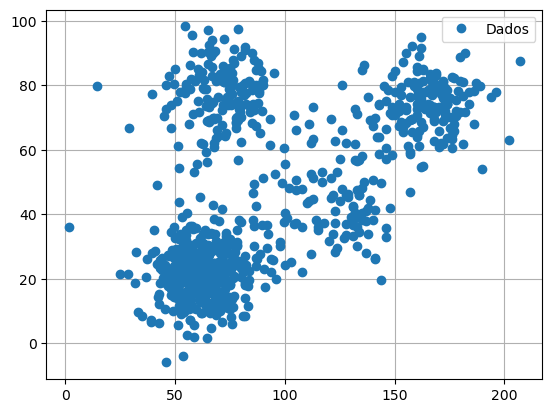

In [36]:
plt.plot(data[:,0], data[:,1], marker='o', ls='none', label='Dados')
plt.grid()
plt.legend()
plt.show()

### Normalização dos dados:

In [37]:
new_data = np.zeros((len(data[:,0]), 3))
np.shape(new_data)

(858, 3)

In [38]:
new_data[:,0] = Kmeans.norm_data(data[:,0])
new_data[:,1] = Kmeans.norm_data(data[:,1])
new_data[:,2] = Kmeans.norm_data(data[:,2])

new_data

array([[0.        , 0.4021687 , 0.        ],
       [0.19614148, 0.5269168 , 0.19614148],
       [0.29163013, 0.49237117, 0.29163013],
       ...,
       [0.2926045 , 0.20545053, 0.2926045 ],
       [0.18201306, 0.12580367, 0.18201306],
       [0.20052616, 0.11793494, 0.20052616]])

### Aplicando Kmeans:

In [39]:
wcss = []

for i in range(1, 11):
    centroids_coord, ite,index, inercia = Kmeans.K_means(new_data, k=i, it=100,
                                                         tol=0.2, random='input_data')
    wcss.append(inercia)

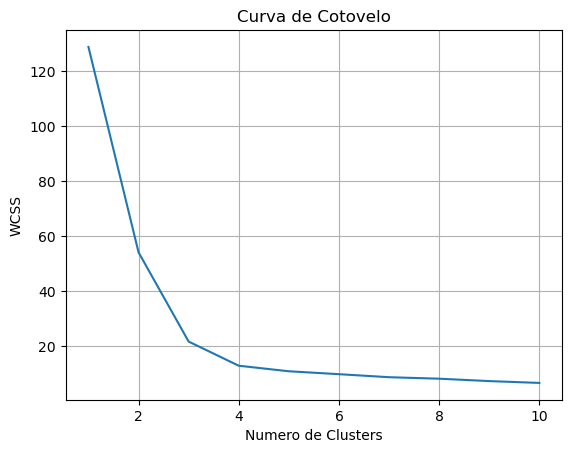

In [40]:
# Mostra o Gráfico
plt.plot(range(1, 11), wcss)
plt.title('Curva de Cotovelo')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS') # "within cluster sum of squares"
plt.grid(True)
plt.show()

In [ ]:
#Aplicando o Kmeans para 4 clusters (k=4):

centroids_coord, ite, index, inercia = Kmeans.K_means(new_data, k=4, it=100,
                                                      tol=0.2, random='input_data')

In [ ]:
#centroids_coord = np.asarray(centroids_coord)

In [ ]:
plt.close('all')
plt.figure(figsize=(8,7))

plt.scatter(new_data[:,0], new_data[:,1], c = index, cmap='viridis'
            , s=70, alpha=1.0) 
plt.scatter(centroids_coord[:,0], centroids_coord[:,1], c='k'
            , s=90, alpha=1.0) 
plt.xlabel('RHOMB', fontsize = 12)
plt.ylabel('GR', fontsize = 12)
plt.grid(True)
plt.show()
    

### Kmeans Sklearn:

In [ ]:
# Módulos do k-means:
from sklearn.cluster import KMeans
from sklearn import datasets

In [ ]:
# Cozinha do K-means: ### Testes com 9 clusters e 2 rochas "acertadas"!

#nprop  = 3                 # número de propriedades físicas ativas
maxiter = 100 ###              # numero maximo de iteracoes 
toler   = 1e-8 ###        # tolerancia para o criterio de parada 
ninit   = 30 ###               # numero de inicializacoes do Kmeans
nclust  = 4            # numero de clusters utilizados

In [ ]:
estimators = KMeans(n_clusters=nclust, 
                    max_iter=maxiter, 
                    init="random", 
                    tol=toler, 
                    n_init=ninit,
                    algorithm="lloyd") # tirar esse int para não ter mesma semente

estimators.fit(new_data)
y_kmeans = estimators.fit(new_data)

In [ ]:
#centroids_coord = np.asarray(centroids_coord)
centroids_coord

### Comparando os dois agrupamentos:

In [ ]:
plt.close('all')

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(221)

ax1.scatter(new_data[:,0],new_data[:,1], c=estimators.labels_,  cmap='viridis'
            , s=70, alpha=1.0)
ax1.scatter(estimators.cluster_centers_[:,0],
                    estimators.cluster_centers_[:,1],c='k',s = 90, alpha=1.0)
ax1.set_xlabel('RHOb', labelpad = 5)
ax1.set_ylabel('GR', labelpad = 5)
ax1.set_title('Kmeans Sklearn')
ax1.grid(True)

ax2 = fig.add_subplot(222) 
ax2.scatter(new_data[:,0], new_data[:,1], c=index, cmap='viridis'
            , s=70, alpha=1.0) 
ax2.scatter(centroids_coord[:,0], centroids_coord[:,1], c='k', s=90, alpha=1.0) 
ax2.set_xlabel('RHOb', labelpad = 5)
ax2.set_ylabel('GR', labelpad = 5)
ax2.set_title('Kmeans Ibsen')
ax2.grid(True)

plt.show()

##### As cores são diferentes, devido a diferença de indices usados,  porém os grupos formados são parecidos!